# Chapter 5 - Priors

## What is a prior
In Bayesian statistics, a **prior** is a concept that is used in order to combine prior knowledge with new data/measurement in order to get a *posterior distribution*. Here the prior determines how much new data will influence the final distribution. The prior encodes all the knowledge known, or assumed about a certain parameter before new data is collected, into a probability distribution. The information used for the prior can come from previous experiments, knowledge or other logical reasoning. As a result different priors can be chosen for the same experiments, based on prior knowledge or beliefs. Not all options for priors are as objective as others and can cause different results.

In some cases the choice for a prior is obvious, take for example the age of the universe. It this point in time we know the age of the universe quite well, but there was a time that this was different. At that time there was only one thing for sure and that was the it must be positive. This is an example of one of the simplest prior possible, an uniform distribution from 0 to infinity.

### Frequentists view on priors
Frequentist do not use the mathematical flexibility of priors used in bayesian statistics. Frequentists assign a long-run frequency to a specific fixed value of the parameter $\theta$, which is often seen as objective. Whereas bayesian statistics assigns a certain subjective belief to $\theta$.

This is not to say that the frequentist perspective is not able to introduce a previous result to improve the current data/measurement. This can be done by:
* Assigning a single value to the most likely value of $\theta$.
* The null hypothesis is often tested against values derived from previous results.
* Prior information can be used to determine what data is worth collecting for the next experiment.

These lacks the benefits of a full prior distribution used in Bayesian statistics. To simulate your full range and intervals of belief for $\theta$.

## Strength of a prior
Priors can be strong and weak. **Strong priors** show a high level of certainty in the parameter's values before looking at the data, while **weak priors** show a low level of certainty. This is shown in the plots below. The weak prior distribution is more spread out than the strong prior distribution. 

Do note that the prior is not bound by gaussians, and can take any shape or form. It does not even require a proper normalized probability density as further explained in the [next subchapter](#Improper-prior)

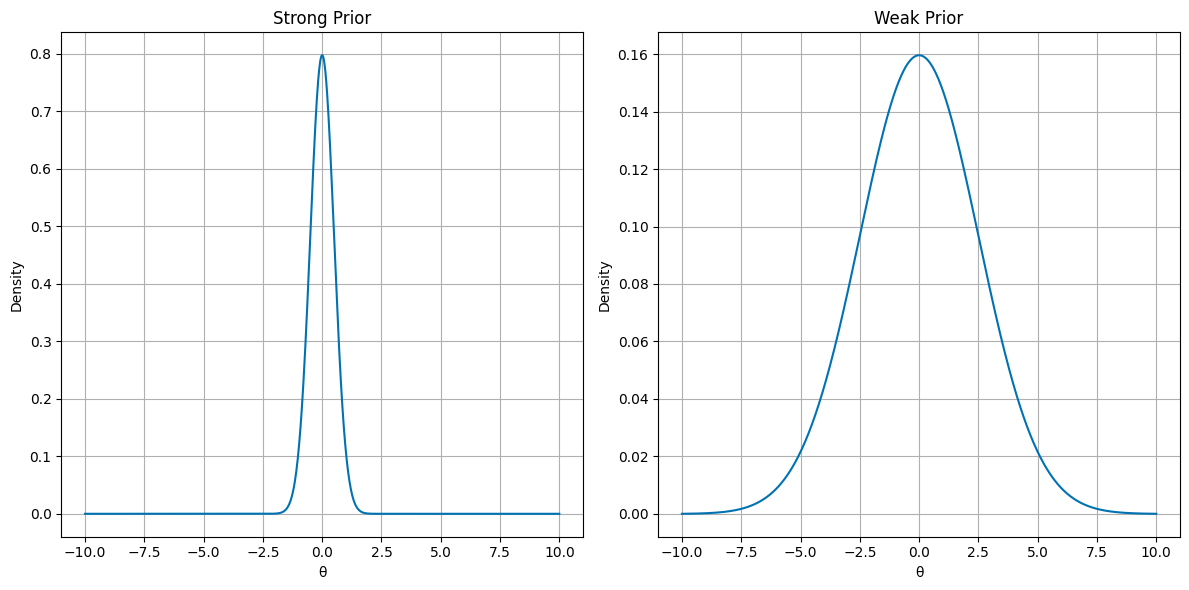

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.style.use("seaborn-v0_8-colorblind")

# Parameters
theta = np.linspace(-10, 10, 1000)

# Strong prior
strong_prior_mean   = 0 
strong_prior_std    = 0.5
strong_prior        = norm.pdf(theta, strong_prior_mean, strong_prior_std)

# Weak prior
weak_prior_mean     = 0
weak_prior_std      = 2.5
weak_prior          = norm.pdf(theta, weak_prior_mean, weak_prior_std)

# Plot figures
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Strong Prior plot
axs[0].plot(theta, strong_prior)
axs[0].set_title('Strong Prior')
axs[0].set_xlabel('θ')
axs[0].set_ylabel('Density')
axs[0].grid()

# Weak Prior plot
axs[1].plot(theta, weak_prior)
axs[1].set_title('Weak Prior')
axs[1].set_xlabel('θ')
axs[1].set_ylabel('Density')
axs[1].grid()

plt.tight_layout()
plt.show()


### Weak Priors
You can use a weak prior when the prior information is uncertain, vague, not trustworthy or not precise. The prior will exert minimal influence on the posterior distribution, which means that the prior is not very informative about the parameters that are being estimated. Weak priors have broad distributions, so the probability is widely spread out over the parameter values and they do not strongly favor a specific value or range. The use of weak priors can lead to less precise estimates of the data, but the use also allows for flexibility because it will not impose strong assumptions about the parameter values. It is also used to minimize the influence of subjective beliefs, thus letting the data "speak for itself".

### Strong Priors
Strong priors are used when the prior information is certain, precise and confident. The prior will exert influence on the posterior distribution, so the prior is informative about the parameters that are being estimated. Strong priors have narrow distributions, so they assign a higher probability to a specific value or range. Using strong priors can improve estimates when the data is limited. However, if a strong prior based on incorrect prior information is used, then the results will be biased.

## Type of priors
### Informative prior
An **informative prior** conveys information about one or more variables in your statistical model. Often the posterior of previous experiments/analyses is used as the prior of current future experiments/analyses.

This has the goal that over time the posterior will be dominated by data, rather then the underlying assumptions made by a weakly informing prior.

In short, an informative prior can be setup if substantial existing information is present, improving the estimate and inference about parameter $\theta_i$, in prior distribution $p \left(\theta_i\right)$

### Weakly informative prior
Rather then building upon an informative prior, a **weakly informative prior** only builds on rough estimates and information known about the aforementioned parameters.

It is important to take into account the inherent objectivity that choosing such a prior brings. And during the process of choosing a prior it is important to not constrain the result and prevent extremities.

**Example:** Choosing $\theta \ge 6$ introduces a purely objective argument to your prior. Whether or not this is valid is still a topic of discussion among statisticians. But it does allow for some useful tricks to apply to Bayesian statistics, as a prior is a requirement for the posterior probability.

As such the construction of a weakly informative prior is as follows (Gelman et al., 2021):
* Start with some version of a noninformative prior distribution and then add enough information so that inferences are constrained to be reasonable.
* Start with a strong, highly informative prior and broaden it to account for uncertainty in one’s prior beliefs and in the applicability of any historically based prior distribution to new data.

### Uninformative prior
If insufficient knowledge is available for the model, a flat or a diffuse prior can also be applied.

#### Flat prior
A **flat prior** gives a fixed probability to $\theta$ for the entire interval. This is often used when you have no information about parameter $\theta$.

#### Diffusie prior
A **diffuse prior** can be chosen when there is a certain expected value, but in reality is not trustworthy enough, or has a very large confidence interval.

A common shape of a diffuse prior is a gaussian with a high relative standard deviation, which essentially corresponds to a flat prior.

### Improper prior
An **improper prior**, or rather a non-informative prior, is a prior which cannot be a proper probability density. As for prior probability density $p\left(\theta_i\right)$ the following can be said:

$$ \int p \left(\theta\right) \text{d} \theta  \neq 1 $$

**Example:** An example for which this is the case is a flat prior, where $p\left(\theta_i\right) \propto \text{constant}$.

Improper priors are usually unproblematic, as the resulting posterior will be a proper probability density.

### Conjugate prior
A **conjugate prior** is a good choice if you have a concrete idea of the model at hand, and as such it falls under the family of strong priors.

Priors are called conjugate when the statistical model $p\left(y |\theta\right)$, the prior $p\left( \theta \right)$, and posterior $p \left( \theta | y_1, y_2, \ldots , y_n \right)$ belong to the same parametric family, with parameter $\theta$.

An example of a conjugate prior in action can be found on the [manual example 2](#Example-2:-Normal-likelihood-and-prior).

## Computational examples of priors
### Example 1: Flipping coins
Suppose we have a coin and we want to know the probability that the coin will land on heads when we flip it. Before us, our friends have also flipped this coin. They had 9 times heads and 11 times tails. We use this as our prior belief. We will also flip the coin 20 times. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom

heads_prior = 9
tails_prior = 11 

theta = np.linspace(0,1,100)


We flip the coin 1, 10, 20 and 100 times and we write down our results. After one time, we saw 1 head and zero tails, after 10 times we saw 6 heads and 4 tails, after 20 times we saw 14 heads and 6 tails, and after 100 times we saw 65 heads and 35 tails.

In [11]:
heads_or_tails = [(1, 0), (6, 4), (14, 6), (65, 35)]


Now we can determine the prior, likelihood and posterior distributions. To calculate the likelihood we use the binomial probability mass function. We plot all three distributions for flipping 1, 10, 20 and 100 times.

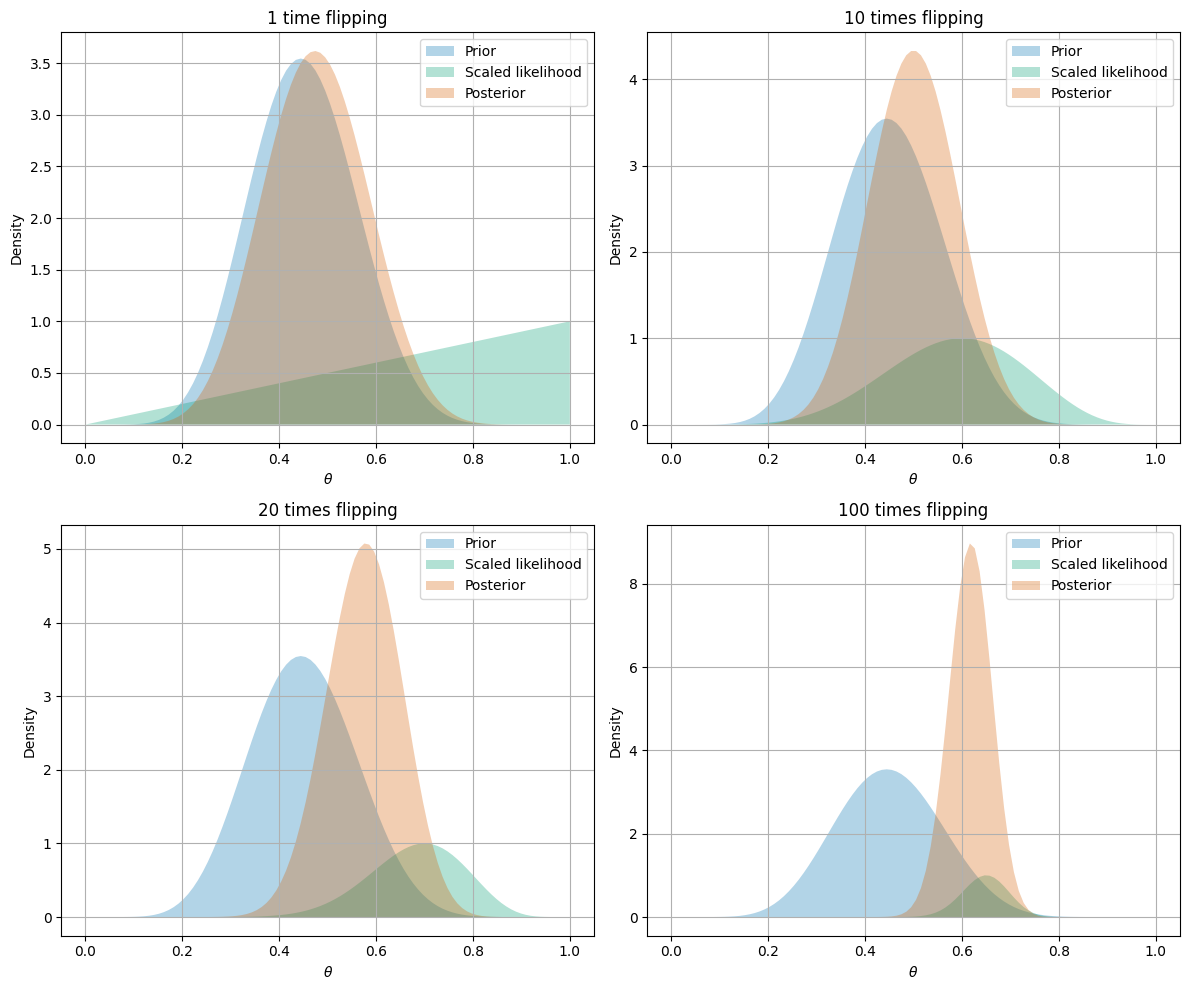

In [12]:
plt.style.use("seaborn-v0_8-colorblind")

titles = ["1 time flipping", "10 times flipping", "20 times flipping", "100 times flipping"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (heads_observed, tails_observed) in enumerate(heads_or_tails):
    
    heads_posterior = heads_prior + heads_observed
    tails_posterior = tails_prior + tails_observed
    
    prior_distribution      = beta.pdf(theta, heads_prior, tails_prior) # the prior follows a Beta distribution
    posterior_distribution  = beta.pdf(theta, heads_posterior, tails_posterior) # the posterior follows a Beta distrbution
    likelihood_distribution = binom.pmf(heads_observed, heads_observed + tails_observed, theta)
    
    # Plot
    ax = axes[i // 2, i % 2]
    ax.fill_between(theta, prior_distribution, alpha=0.3, label="Prior")
    ax.fill_between(theta, likelihood_distribution / likelihood_distribution.max(), alpha=0.3, label="Scaled likelihood")
    ax.fill_between(theta, posterior_distribution, alpha=0.3, label="Posterior")
    ax.set_title(titles[i])
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


### Example 2: Estimating the mass of an exoplanet
Exoplanets can be discovered using the radial velocity method. Astronomers found a wobbling star, and based on this wobbling, they want to estimate the mass of the exoplanet. 

Before the astronmers collected data, they looked at earlier researches and found that exoplanet masses follow a log-normal distribution, with a mean mass of 3 Earth masses. They use this posterior distribution as their prior.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

mu_prior            = np.log(3)   # mean mass of 3 Earth masses
sigma_prior         = 0.6      # standard deviation
prior_distribution  = lognorm(s=sigma_prior, scale=np.exp(mu_prior)) 
mass_values         = np.linspace(0.1, 15, 1000)  # mass range in Earth masses
prior_pdf           = prior_distribution.pdf(mass_values) # make the PDF of the prior


The astronomers conducted their research and found a mass of 5 Earth masses. They use this to make the likelihood.

In [14]:
observed_mass   = 5.0
likelihood      = norm(loc=observed_mass)
likelihood_pdf  = likelihood.pdf(mass_values) # make the PDF of the likelihood


Now, the astronomers can combine the prior with the likelihood, using Bayes' theorem, to determine the posterior distribution. 

In [ ]:
posterior_pdf = (prior_pdf * likelihood_pdf) / np.trapezoid(prior_pdf * likelihood_pdf, mass_values)  # make the PDF of the posterior


/tmp/ipykernel_5889/1969620551.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  posterior_pdf = (prior_pdf * likelihood_pdf) / np.trapz(prior_pdf * likelihood_pdf, mass_values)  # make the PDF of the posterior


The astronomers can now plot the prior, likelihood and posterior distributions.

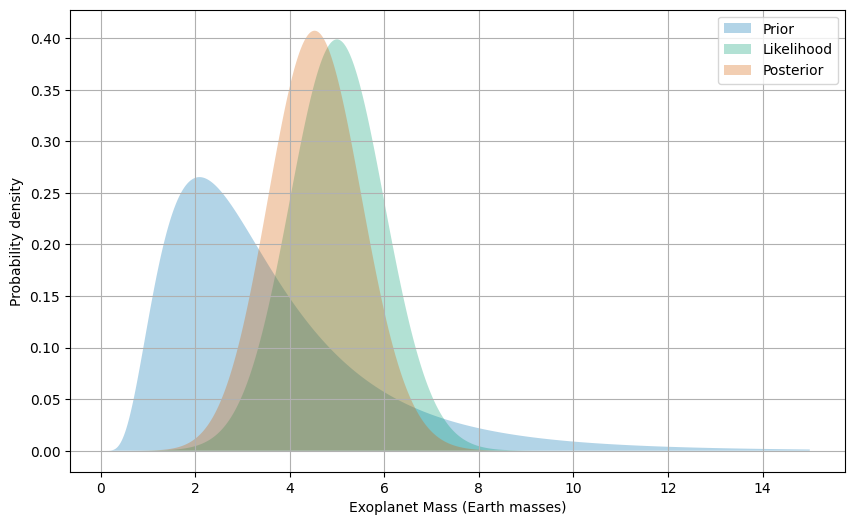

In [16]:
plt.style.use("seaborn-v0_8-colorblind")

plt.figure(figsize=(10, 6))
plt.fill_between(mass_values, prior_pdf, alpha=0.3, label="Prior")
plt.fill_between(mass_values, likelihood_pdf, alpha=0.3, label="Likelihood")
plt.fill_between(mass_values, posterior_pdf, alpha=0.3, label="Posterior")
plt.xlabel("Exoplanet Mass (Earth masses)")
plt.ylabel("Probability density")
plt.legend()
plt.grid()
plt.show()


## Manual examples of (conjugate) priors

There are some special cases where these calculations can even be done by hand. In these cases the likelihood function and the prior distribution are both from the same family of functions, resulting in a relatively easy calculation. These priors, of the same family of functions, are often called conjugate priors. We will look at two different examples, one where two poisson distributions will lead to a gamma function and one where two normal distributions will result in another normal distribution.

### Example 1: Poisson likelihood and prior
For the first example we will look at a situation where both the likelihood function and the prior distribution are a poisson distribution. We will first define both functions, where it is, in this case, not really important which one is which:

$$ f(x) = \frac{\lambda_1^xe^{-\lambda_1}}{x!}, g(x) = \frac{\lambda_2^xe^{-\lambda_2}}{x!}\ $$

In order to get the posterior distribution we will multiply these functions to get:

$$ P(x) = f(x)g(x) $$
$$ = \frac{1}{(x!)^2}\lambda_1^x\lambda_2^xe^{-\lambda_1}e^{-\lambda_2} $$
$$ = \frac{1}{(x!)^2}(\lambda_1\lambda_2)^xe^{-(\lambda_1+\lambda_2)} $$

This result can be recognised as a gammafunction. One small detail for this example is that is not yet normalized, which of course needs to be done before using it.



### Example 2: Normal likelihood and prior
Another example is a situation where both the likelihood function and the prior distribution are a normal distribution. This works similar as the first example, but it is a bit more work to recognise the final distribution (Smith, 2011). Again we will start by defining both functions:

$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma_f}e^{-\frac{(x-\mu_f)^2}{2\sigma_f^2}}, g(x) = \frac{1}{\sqrt{2\pi}\sigma_g}e^{-\frac{(x-\mu_g)^2}{2\sigma_g^2}} $$

After which we will be able to multiply them:

$$ f(x)g(x) = \frac{1}{2\pi\sigma_f\sigma_g}e^{-\left(\frac{(x-\mu_f)^2}{2\sigma_f^2}+\frac{(x-\mu_g)^2}{2\sigma_g^2}\right)} $$

In order to see what is going on, we will define $\alpha$ as

$$ \alpha = -\left(\frac{(x-\mu_f)^2}{2\sigma_f^2}+\frac{(x-\mu_g)^2}{2\sigma_g^2}\right) $$

Which we can expand to get:

$$ \alpha = -\frac{(\sigma_f^2+\sigma_g^2)x^2-2(\mu_f\sigma_g^2+\mu_g\sigma_f^2)x+\mu_f^2\sigma_g^2+\mu_g^2\sigma_f^2}{2\sigma_f^2\sigma_g^2} $$

This can then be rewritten to:

$$ \alpha = -\frac{x^2-2\frac{\mu_f\sigma_g^2+\mu_g\sigma_f^2}{\sigma_f^2+\sigma_g^2}x+\frac{\mu_f^2\sigma_g^2+\mu_g^2\sigma_f^2}{\sigma_f^2+\sigma_g^2}}{\frac{2\sigma_f^2\sigma_g^2}{\sigma_f^2+\sigma_g^2}} $$

When looking at this carefully, we see that this is equal to:

$$ \alpha = -\frac{(x-\mu_{fg})^2}{2\sigma_{fg}^2} -\gamma $$

With:

$$ \sigma_{fg} = \sqrt{\frac{\sigma_f^2\sigma_g^2}{\sigma_f^2+\sigma_g^2}}, \mu_{fg} = \frac{\mu_f\sigma_g^2+\mu_g\sigma_f^2}{\sigma_f^2+\sigma_g^2} $$

Putting this in for the posterior distribution $P(x) = f(x)g(x)$, we will see that it is not important what $\gamma$ exactly is, since it is independent of $x$. Therefore $\gamma$ will only be a scaling factor. We get:

$$ P(x) = \frac{e^{-\gamma}}{\sqrt{2\pi}\sigma_{f}\sigma_g}e^{-\frac{(x-\mu_{fg})^2}{2\sigma_{fg}^2}} $$

We know that the integral of the posterior distribution over all values of $x$ must be 1, thus we can use this to normalize the expression we found:

$$ \int_{-\infty}^{\infty}P(x) = \frac{e^{-\gamma}}{\sqrt{2\pi(\sigma_f^2+\sigma_g^2)}} = 1 $$

So we end up with:

$$ P(x) = \frac{1}{\sqrt{2\pi}\sigma_{fg}}e^{-\frac{(x-\mu_{fg})^2}{2\sigma_{fg}^2}} $$

This can be easily recognised as a normal distribution, which beautifully shows the elegance of conjugate priors. 


## Sources
Gelman, A., Carlin, J.B., Stern, H.S., Dunson, D.B., Vehtari, A., & Rubin, D.B. (2013). Bayesian Data Analysis (3rd ed.). Chapman and Hall/CRC. https://doi.org/10.1201/b16018 

Smith, J. O. S., III. (2011). Spectral Audio signal processing. W3K Publishing. ISBN 978-0-9745607-3-1